# Part 2: Mean-field models

The CA model will become infeasible when the number of state variables becomes large (too many cells). Here, we derive a mean-field approximation to model desertification control process. In this model, we will ignore neighborhood influence and assume that cells are fully-connected. Then we only need to analysis the change of fraction of the population.

We further simplify the conditions of land into two: $N$ represents non-desertification. $D$ represents desertification. We also simplify the type of trees into one. So a piece of land could be either $B$ (bald and no trees), or $V$ (vegatated). Overall, our mean-field model has four states and we define four time-dependent variable for each state.

- $NB_t$ be the fraction of land that is bald but not desertified at time $t$;
- $NV_t$ be the fraction of land that is covered with vegetation and not desertified at time $t$;
- $DB_t$ be the fraction of land that is bald and desertified at time $t$;
- $DV_t$ be the fraction of land that is covered with vegetation and desertified at time $t$,

where $NB_t + NV_t + DB_t + DV_t = 1$.

The transition between states can be represented in the figure below ![avatar](state_transition.jpg)

where

- $c_1$ is the conversion rate of non-desertification to desertification when the land is bald.
- $c_2$ is the conversion rate of desertification to non-desertification when the land is cover with vegetation.
- $d_1$ is the dying rate of trees on non_desertified land.
- $d_2$ is the dying rate of trees on desertified land.
- $p_1$ is the maximum fraction of non-desertified land that we plant trees at each time step.
- $p_2$ is the maximum fraction of desertified land that we plant trees at each time step.
- $\hat{p_1}$ is the real fraction of non-desertified land that we plant trees at each time step. $\hat{p_1} = \min\{p_1, NB_t(1-c_1)\}$.
- $\hat{p_2}$ is the real fraction of desertified land that we plant trees at each time step. $\hat{p_2} = \min\{p_2, DB_t\}$.

Then, our discrete-time dynamical system is:
\begin{align}
NB_{t+1} &= NB_t * (1-c_1) + NV_t * d_1 - \min\{p_1, NB_t(1 - c_1) \} \\
NV_{t+1} &= NV_t * (1-d_1) + DV_t * c_2 + \min\{p_1, NB_t(1 - c_1) \} \\
DB_{t+1} &= DB_t + NB_t * c_1 + DV_t * d_2 - \min\{p_2, DB_t\} \\
DV_{t+1} &= DV_t * (1-c_2-d_2) + \min\{p_2, DB_t\}
\end{align}

## Implementing the mean-field model

Let's first build a forward step function to calculate the state variables of the next time step.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def forward_step(x, c1, c2, d1, d2, p1, p2):
    x_next = x.copy()
    NB = 0
    NV = 1
    DB = 2
    DV = 3
    x_next[NB] = x[NB] * (1 - c1) + x[NV] * d1 - min(p1, x[NB] * (1 - c1))
    x_next[NV] = x[NV] * (1 - d1) + x[DV] * c2 + min(p1, x[NB] * (1 - c1))
    x_next[DB] = x[DB] + x[NB] * c1 + x[DV] * d2- min(p2, x[DB])
    x_next[DV] = x[DV] * (1 - c2 - d2) + min(p2, x[DB])
    return x_next

Next we build a function that simulates the system for $t_{max}$ time steps. Assume $DB=1$ as the initial state. 

In [24]:
def sim(t_max, c1, c2, d1, d2, p1, p2):
    X = np.zeros((4, t_max+1))
    X[:, 0] = np.array([0, 0, 1, 0])
    for t in range(t_max):
        X[:, t+1] = forward_step(X[:, t], c1, c2, d1, d2, p1, p2)
    return X

def summarize_sim(X, c1, c2, d1, d2, p1, p2):
    t_max = X.shape[1] - 1
    print('Simulation results: t_max = {}, c1={}, c2={}, d1={}, d2={}, p1={}, p2={}'.format(t_max, c1, c2, d1, d2, p1, p2))
    NB = X[0, -1]
    NV = X[1, -1]
    DB = X[2, -1]
    DV = X[3, -1]
    print("- NB_{{{}}} = {:.3f}".format(t_max, NB))
    print("- NV_{{{}}} = {:.3f}".format(t_max, NV))
    print("- DB_{{{}}} = {:.3f}".format(t_max, DB))
    print("- DV_{{{}}} = {:.3f}".format(t_max, DV))
    
def plot_sim(X, c1, c2, d1, d2, p1, p2):
    t_max = X.shape[1] - 1
    T = np.arange(t_max + 1)
    plt.plot(T, X[0, :], 'y-')
    plt.plot(T, X[1, :], 'r-')
    plt.plot(T, X[2, :], 'b-')
    plt.plot(T, X[3, :], 'g-')
    plt.legend(['NB', 'NV', 'DB', 'DV'])
    plt.axis([0, t_max+1, 0, 1])
    plt.title('c1={}, c2={}, d1={}, d2={}, p1={}, p2={}'.format(c1, c2, d1, d2, p1, p2))

Now we set the parameters as $c_1 = 0.1$, $c_2 = 0.1$, $d_1 = 0.01$, $d_2 = 0.2$, $p_1 = 0.2$, $p_2 = 0.2$ and run the simulation to see the result.

Simulation results: t_max = 100, c1=0.2, c2=0.1, d1=0.01, d2=0.2, p1=0.2, p2=0.2
- NB_{100} = 0.010
- NV_{100} = 0.965
- DB_{100} = 0.006
- DV_{100} = 0.019


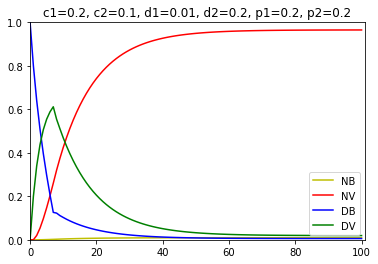

In [25]:
t_max = 100
c1 = 0.2
c2 = 0.1
d1 = 0.01
d2 = 0.2
p1 = 0.2
p2 = 0.2
X = sim(t_max, c1, c2, d1, d2, p1, p2)
summarize_sim(X, c1, c2, d1, d2, p1, p2)
plot_sim(X, c1, c2, d1, d2, p1, p2)

In the simulation experiment above, the desert is converted into green land in about 50 time steps.

If we 

## Finding a good strategy that minimizes the cost

After implementing our simulation model, we want to find a good strategy of planting trees that minimizes the cost to convert a bald desert land into green land. Here, strategies are represented by two values: $p_1$ and $p_2$. Cost is the total number of trees died during a given length of time steps. A successful desertification control means the fraction of non-desertified land covered with vegetation (NV) becomes larger than 0.9 after a given time.

Let's assume the number of time steps we are given to control the desertification of a piece of land is 50, i.e. $t_{max} = 50$. In order to find the best strategy, we will apply grid search over $p_1$ and $p_2$ to find the best pair of values that minimizes the number of trees died while satisfies $NV \geq 0.9$ at time step 50.

First, we need to modify our 'forward_step' function to return the number of trees die during a time step.

In [26]:
def forward_step_new(x, c1, c2, d1, d2, p1, p2):
    x_next = x.copy()
    NB = 0
    NV = 1
    DB = 2
    DV = 3
    x_next[NB] = x[NB] * (1 - c1) + x[NV] * d1 - min(p1, x[NB] * (1 - c1))
    x_next[NV] = x[NV] * (1 - d1) + x[DV] * c2 + min(p1, x[NB] * (1 - c1))
    x_next[DB] = x[DB] + x[NB] * c1 + x[DV] * d2- min(p2, x[DB])
    x_next[DV] = x[DV] * (1 - c2 - d2) + min(p2, x[DB])
    tree_died = x[NV] * d1 + x[DV] * d2
    return x_next, tree_died

Second, we need to modify our 'sim' function to return the total number of trees die during $t_{max}$ time steps.

In [27]:
def sim_new(t_max, c1, c2, d1, d2, p1, p2):
    X = np.zeros((4, t_max+1))
    X[:, 0] = np.array([0, 0, 1, 0])
    total_tree_died = 0
    for t in range(t_max):
        X[:, t+1], tree_died = forward_step_new(X[:, t], c1, c2, d1, d2, p1, p2)
        total_tree_died += tree_died
    return X, total_tree_died

def summarize_sim_new(X, c1, c2, d1, d2, p1, p2):
    t_max = X.shape[1] - 1
    print('Simulation results: t_max = {}, c1={}, c2={}, d1={}, d2={}, p1={}, p2={}'.format(t_max, c1, c2, d1, d2, p1, p2))
    NB = X[0, -1]
    NV = X[1, -1]
    DB = X[2, -1]
    DV = X[3, -1]
    print("- NB_{{{}}} = {:.3f}".format(t_max, NB))
    print("- NV_{{{}}} = {:.3f}".format(t_max, NV))
    print("- DB_{{{}}} = {:.3f}".format(t_max, DB))
    print("- DV_{{{}}} = {:.3f}".format(t_max, DV))

def plot_sim_new(X, c1, c2, d1, d2, p1, p2):
    t_max = X.shape[1] - 1
    T = np.arange(t_max + 1)
    plt.plot(T, X[0, :], 'y-')
    plt.plot(T, X[1, :], 'r-')
    plt.plot(T, X[2, :], 'b-')
    plt.plot(T, X[3, :], 'g-')
    plt.legend(['NB', 'NV', 'DB', 'DV'])
    plt.axis([0, t_max+1, 0, 1])
    plt.title('c1={}, c2={}, d1={}, d2={}, p1={}, p2={}'.format(c1, c2, d1, d2, p1, p2))

Next, we need to write a script to perform grid search over $p_1$ and $p_2$. We will keep the values of $c_1, c_2, d_1, d_2$ the same as our first experiment.

In [28]:
t_max = 50
c1 = 0.2
c2 = 0.1
d1 = 0.01
d2 = 0.2
p1_lst = [0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064]
p2_lst = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64]
NV_matrix = np.zeros((len(p1_lst), len(p2_lst)))
total_tree_died_matrix = np.zeros((len(p1_lst), len(p2_lst)))
best_cost = 1000
for i in range(len(p1_lst)):
    for j in range(len(p2_lst)):
        p1 = p1_lst[i]
        p2 = p2_lst[j]
        X, total_tree_died = sim_new(t_max, c1, c2, d1, d2, p1, p2)
        NV_matrix[i, j] = X[1, -1]
        total_tree_died_matrix[i, j] = total_tree_died
        if NV_matrix[i, j] > 0.9 and total_tree_died_matrix[i, j] < best_cost:
            best_cost = total_tree_died
            best_p1 = p1
            best_p2 = p2
np.set_printoptions(precision=4)
print('NV_matrix:')
print(NV_matrix)
print('\n')
print('total_tree_died_matrix:')
print(total_tree_died_matrix)
print('\n')
print('best strategy: p1={}, p2={}'.format(best_p1, best_p2))


NV_matrix:
[[0.1471 0.2795 0.5325 0.837  0.8555 0.8574 0.8579]
 [0.1475 0.2942 0.559  0.8525 0.8706 0.8725 0.8729]
 [0.1475 0.2951 0.5884 0.8816 0.9003 0.9025 0.903 ]
 [0.1475 0.2951 0.5901 0.9177 0.9473 0.9513 0.9522]
 [0.1475 0.2951 0.5901 0.9177 0.9473 0.9513 0.9522]
 [0.1475 0.2951 0.5901 0.9177 0.9473 0.9513 0.9522]
 [0.1475 0.2951 0.5901 0.9177 0.9473 0.9513 0.9522]]


total_tree_died_matrix:
[[0.3455 0.6896 1.375  2.3102 2.5412 2.6054 2.6252]
 [0.3455 0.6909 1.3792 2.2791 2.5012 2.5623 2.5809]
 [0.3455 0.6909 1.3818 2.2331 2.4327 2.4857 2.5018]
 [0.3455 0.6909 1.3818 2.2084 2.3688 2.4092 2.4216]
 [0.3455 0.6909 1.3818 2.2084 2.3688 2.4092 2.4216]
 [0.3455 0.6909 1.3818 2.2084 2.3688 2.4092 2.4216]
 [0.3455 0.6909 1.3818 2.2084 2.3688 2.4092 2.4216]]


best strategy: p1=0.008, p2=0.08


## How will the initial state affect the simulation result?

Now we are going to study how will the initial state affect our simulation model. Assume at time $t_0$, every piece of land could only be in two state: $NV$ or $DB$ (i.e. $NV_0 + DB_0 = 1, NB_0 = DV_0 = 0$). Let's see how many trees will die before $NV > 0.9$, if we start from different initial states.

Text(0, 0.5, 'cost (# trees died)')

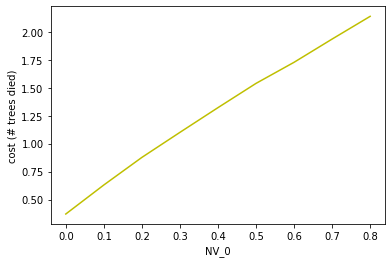

In [29]:
t_max = 50
c1 = 0.2
c2 = 0.1
d1 = 0.01
d2 = 0.2
p1 = 0.008
p2 = 0.08
DB0 = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cost_lst = []
for i in range(len(DB0)):
    x = np.zeros((4,1))
    x[1] = 1 - DB0[i]
    x[2] = DB0[i]
    total_cost = 0
    for t in range(t_max):
        x, cost = forward_step_new(x, c1, c2, d1, d2, p1, p2)
        total_cost += cost
        if x[1] > 0.9:
            cost_lst.append(total_cost)
            break
    
plt.plot(NV0, cost_lst, 'y-')
plt.xlabel('NV_0')
plt.ylabel('cost (# trees died)')

It shows that the cost decreases almost linearily when $DB_0$ increases. The result superised me a little bit. I have expected a larger curvature than this. It is intuitive to think that the severer the desertification is, the harder it is to control the desertification. However, our models gives an almost linear relationship.

It is interesting to see that if we change the assumption about the initial state to "$NB_0 + DB_0 = 1, NV_0 = DV_0 = 0$, the result is in accord with our intuition. The non-linearity in the show means it is much harder to control the desertification if the desertification is already very severe.

Text(0, 0.5, 'cost (# trees died)')

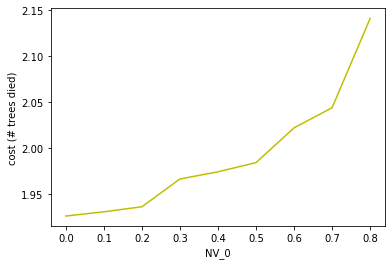

In [30]:
t_max = 50
c1 = 0.2
c2 = 0.1
d1 = 0.01
d2 = 0.2
p1 = 0.008
p2 = 0.08
NB0 = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cost_lst = []
for i in range(len(NB0)):
    x = np.zeros((4,1))
    x[0] = 1 - NB0[i]
    x[2] = NB0[i]
    total_cost = 0
    for t in range(t_max):
        x, cost = forward_step_new(x, c1, c2, d1, d2, p1, p2)
        total_cost += cost
        if x[1] > 0.9:
            cost_lst.append(total_cost)
            break
    
plt.plot(NV0, cost_lst, 'y-')
plt.xlabel('NV_0')
plt.ylabel('cost (# trees died)')